In [26]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

base_path = "/Users/tingxuanhu/Downloads/dataset/luna16-7"
os.listdir(base_path)  # return a list

['1.3.6.1.4.1.14519.5.2.1.6279.6001.850739282072340578344345230132.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353693253759289796610.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.957384617596077920906744920611.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.970264865033574190975654369557.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.946129570505893110165820050204.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.868211851413924881662621747734.mhd',
 '.DS_Store',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.939216568327879462530496768794.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.980362852713685276785310240144.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.861997885565255340442123234170.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.897279226481700053115245043064.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.897161587681142256575045076919.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311.mhd',
 '1.3.6.1.4.1.14519.5.2.1.6279.6001.8

ValueError: num must be 1 <= num <= 30, not 31

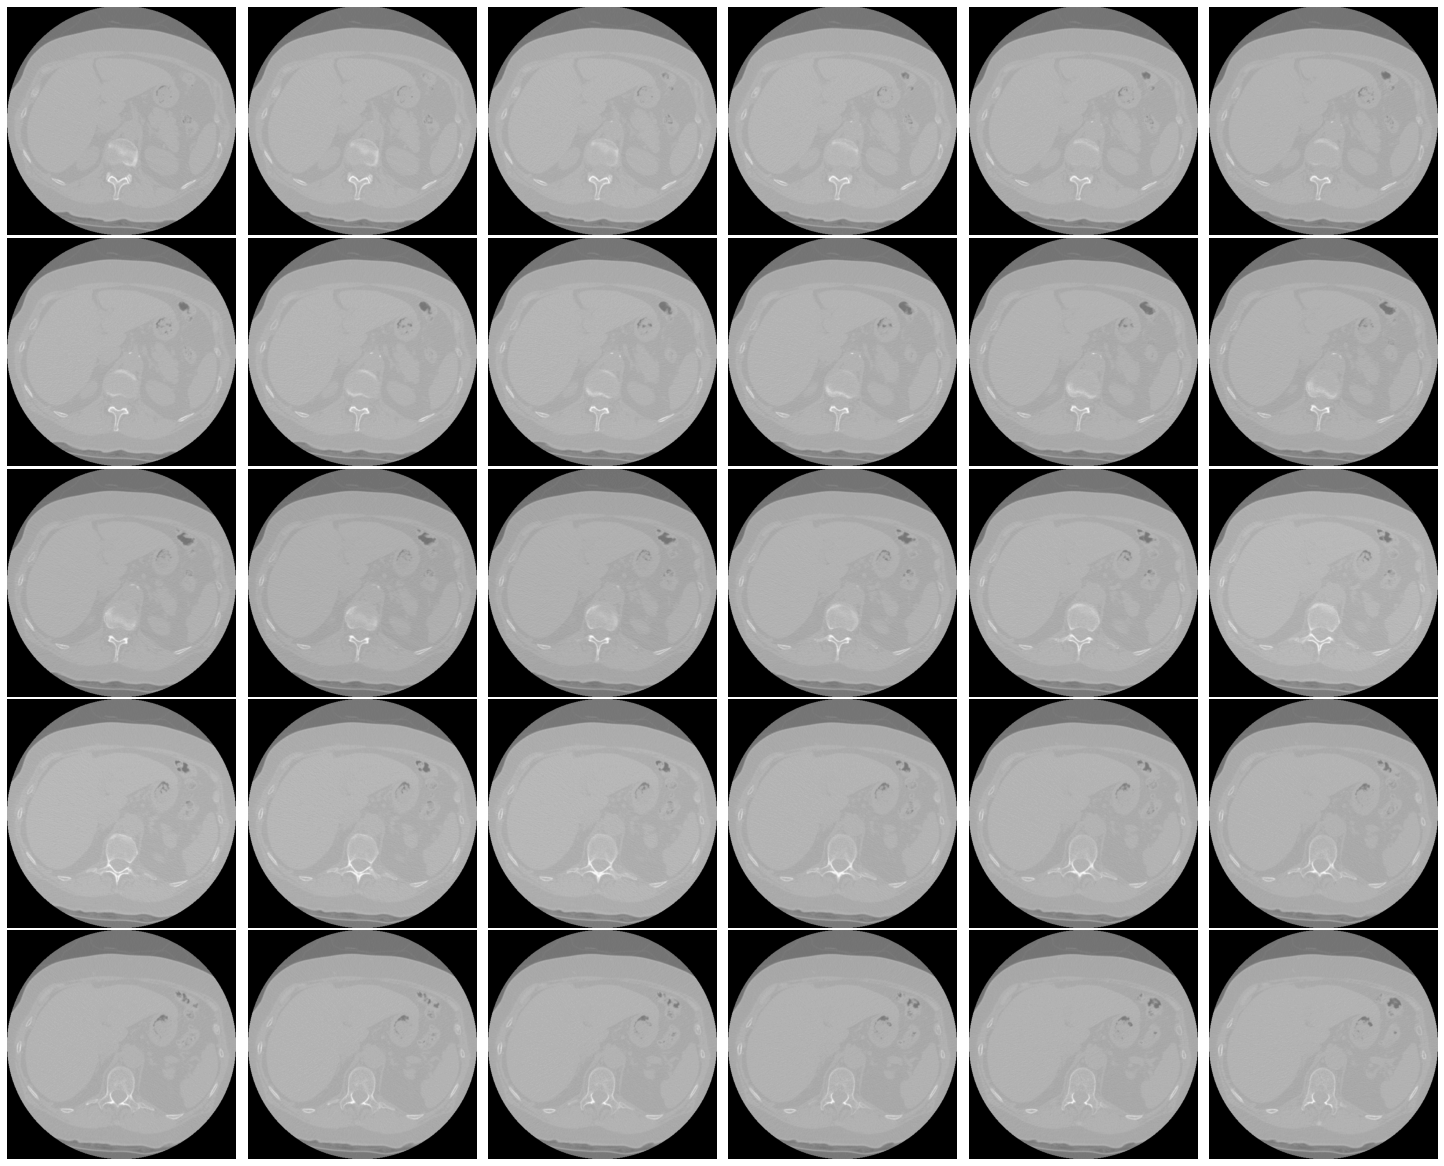

In [31]:
for file in os.listdir(base_path):
    if not file.endswith('.DS_Store'):
        expand_file = os.path.join(base_path, file)
        read_file = os.listdir(expand_file)
        # print(read_file)
        """
        ['1.3.6.1.4.1.14519.5.2.1.6279.6001.850739282072340578344345230132.mhd', '1.3.6.1.4.1.14519.5.2.1.6279.6001.850739282072340578344345230132.raw']
        ......
        """

        for img in read_file:
            if img.endswith('.mhd'):
                img_address = os.path.join(expand_file, img)
                dicom_mhd = sitk.ReadImage(img_address)

                # # dicom_mhd中可以获取层间距，方向向量等等dicom文件metadata中包含的信息
                # dicom_mhd.GetSpacing()

                # dicom_array为序列包含的所有Image信息，使用SimpleITK读取时，传入参数dicom_mhd，会自动读取 *.raw文件
                dicom_array = sitk.GetArrayFromImage(dicom_mhd)  # --> np.ndarray

                # # 第一维度为序列图像数量，后两维度为高度和宽度
                # dicom_array.shape

                # plt.figure(figsize=(20,16))
                # plt.gray()
                # plt.subplots_adjust(0,0,1,1,0.01,0.01)
                # for i in range(dicom_array.shape[0]):
                #     plt.subplot(5,6,i+1), plt.imshow(dicom_array[i]), plt.axis('off')
                #     # use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
                # plt.show()
